# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Чтобы при каждом запуске кода получать один ответ в тех частях, где присутствует генерация чего-то случайного")

Чтобы при каждом запуске кода получать один ответ в тех частях, где присутствует генерация чего-то случайного


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(10, random_state=42)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test.head(5).append(df_test.tail(5))

/var/folders/6f/3vj27vmj1_g4hyzs0s9k_3cm0000gn/T/ipykernel_6772/633319184.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test.head(5).append(df_test.tail(5))


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [7]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


Пропуски в колонках mileage, engine, max_power, torque, seats

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [10]:
train_without_price = df_train.drop(columns=['selling_price'])
train_without_price[train_without_price.duplicated()].groupby(list(train_without_price.columns)).count().shape[0]

624

624 уникальных записи, которые повторяются

In [11]:
train_without_price[train_without_price.duplicated(keep=False)].shape[0]

1799

1799 повторяющихся записей

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [12]:
train_without_price[train_without_price.duplicated(keep=False)]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [13]:
df_train.drop_duplicates(subset=list(set(df_train.columns)-set(['selling_price'])), inplace=True)

In [14]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [15]:
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [16]:
df_train.mileage = df_train.mileage.str.replace(' kmpl', '')
df_train.mileage = df_train.mileage.str.replace(' km/kg', '')
df_train.mileage = df_train.mileage.astype(float)

In [17]:
df_test.mileage = df_test.mileage.str.replace(' kmpl', '')
df_test.mileage = df_test.mileage.str.replace(' km/kg', '')
df_test.mileage = df_test.mileage.astype(float)

In [18]:
df_train.engine = df_train.engine.str.replace(' CC', '')
df_train.engine = df_train.engine.astype(float)

In [19]:
df_test.engine = df_test.engine.str.replace(' CC', '')
df_test.engine = df_test.engine.astype(float)

In [20]:
df_train.max_power = df_train.max_power.str.replace(' bhp', '')
df_train.max_power = df_train.max_power.str.replace('', '0')
df_train.max_power = df_train.max_power.astype(float)

In [21]:
df_test.max_power = df_test.max_power.str.replace(' bhp', '')
df_test.max_power = df_test.max_power.str.replace('', '0')
df_test.max_power = df_test.max_power.astype(float)

In [22]:
train_torque = df_train.torque.str.extract(r"([\.\d]+)\s*([A-Za-z]*)\s*[@at]+ ([\~\d,-]+)(.*)")
train_torque[3] = train_torque[3].replace('(kgm@ rpm)', 'kgm')
train_torque[3] = train_torque[3].replace('+/-500(NM@ rpm)', 'Nm')
train_torque.loc[(train_torque[1]=='') &
                 ((train_torque[3]=='kgm') |
                  (train_torque[3]=='Nm')), 1] = train_torque.loc[(train_torque[1]=='') & 
                                                                  ((train_torque[3]=='kgm') | 
                                                                   (train_torque[3]=='Nm')), 3]
train_torque[2] = train_torque[2].replace('[\d,]+[\~-]', '', regex=True)
train_torque[2] = train_torque[2].str.replace(',', '').astype(float)
train_torque[0] = train_torque[0].astype(float)
train_torque.loc[(train_torque[1]=='kgm'), 0] *= 9.80665#все приводим к Nm https://en.wikipedia.org/wiki/Kilopondmetre
train_torque

,0,1,2,3
0,190.000000,Nm,2000.0,rpm
1,250.000000,Nm,2500.0,rpm
2,219.668960,kgm,2750.0,rpm
3,112.776475,kgm,4500.0,kgm
4,113.750000,nm,4000.0,rpm
...,...,...,...,...
5835,96.100000,Nm,3000.0,rpm
5836,90.000000,Nm,3500.0,rpm
5837,113.700000,Nm,4000.0,rpm
5838,235.359600,kgm,2750.0,kgm


In [23]:
df_train[['torque', 'max_torque_rpm']] = train_torque[[0, 2]]

In [24]:
test_torque = df_test.torque.str.extract(r"([\.\d]+)\s*([A-Za-z]*)\s*[@at]+ ([\~\d,-]+)(.*)")
test_torque[3] = test_torque[3].replace('(kgm@ rpm)', 'kgm')
test_torque[3] = test_torque[3].replace('+/-500(NM@ rpm)', 'Nm')
test_torque.loc[(test_torque[1]=='') &
                 ((test_torque[3]=='kgm') |
                  (test_torque[3]=='Nm')), 1] = test_torque.loc[(test_torque[1]=='') & 
                                                                  ((test_torque[3]=='kgm') | 
                                                                   (test_torque[3]=='Nm')), 3]
test_torque[2] = test_torque[2].replace('[\d,]+[\~-]', '', regex=True)
test_torque[2] = test_torque[2].str.replace(',', '').astype(float)
test_torque[0] = test_torque[0].astype(float)
test_torque.loc[(test_torque[1]=='kgm'), 0] *= 9.80665
df_test[['torque', 'max_torque_rpm']] = test_torque[[0, 2]]

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [25]:
df_train=df_train.fillna(df_train[['mileage', 'engine', 'max_power',
                                   'torque', 'seats', 'max_torque_rpm']].median())
df_test=df_test.fillna(df_train[['mileage', 'engine', 'max_power',
                                   'torque', 'seats', 'max_torque_rpm']].median())
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   float64
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   float64
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [26]:
print("""Признак seats принимает конечное (небольшое) число значений, увеличение или уменьшение количества
сидений не имеет однозначного положительного или отрицательного влияния. 
Пример: 2 сидения может быть у дорогого спорткара или у дешевой маленькой машины""")

Признак seats принимает конечное (небольшое) число значений, увеличение или уменьшение количества
сидений не имеет однозначного положительного или отрицательного влияния. 
Пример: 2 сидения может быть у дорогого спорткара или у дешевой маленькой машины


In [27]:
df_train.engine = df_train.engine.astype(int)
df_train.seats = df_train.seats.astype(int)
df_test.engine = df_test.engine.astype(int)
df_test.seats = df_test.seats.astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

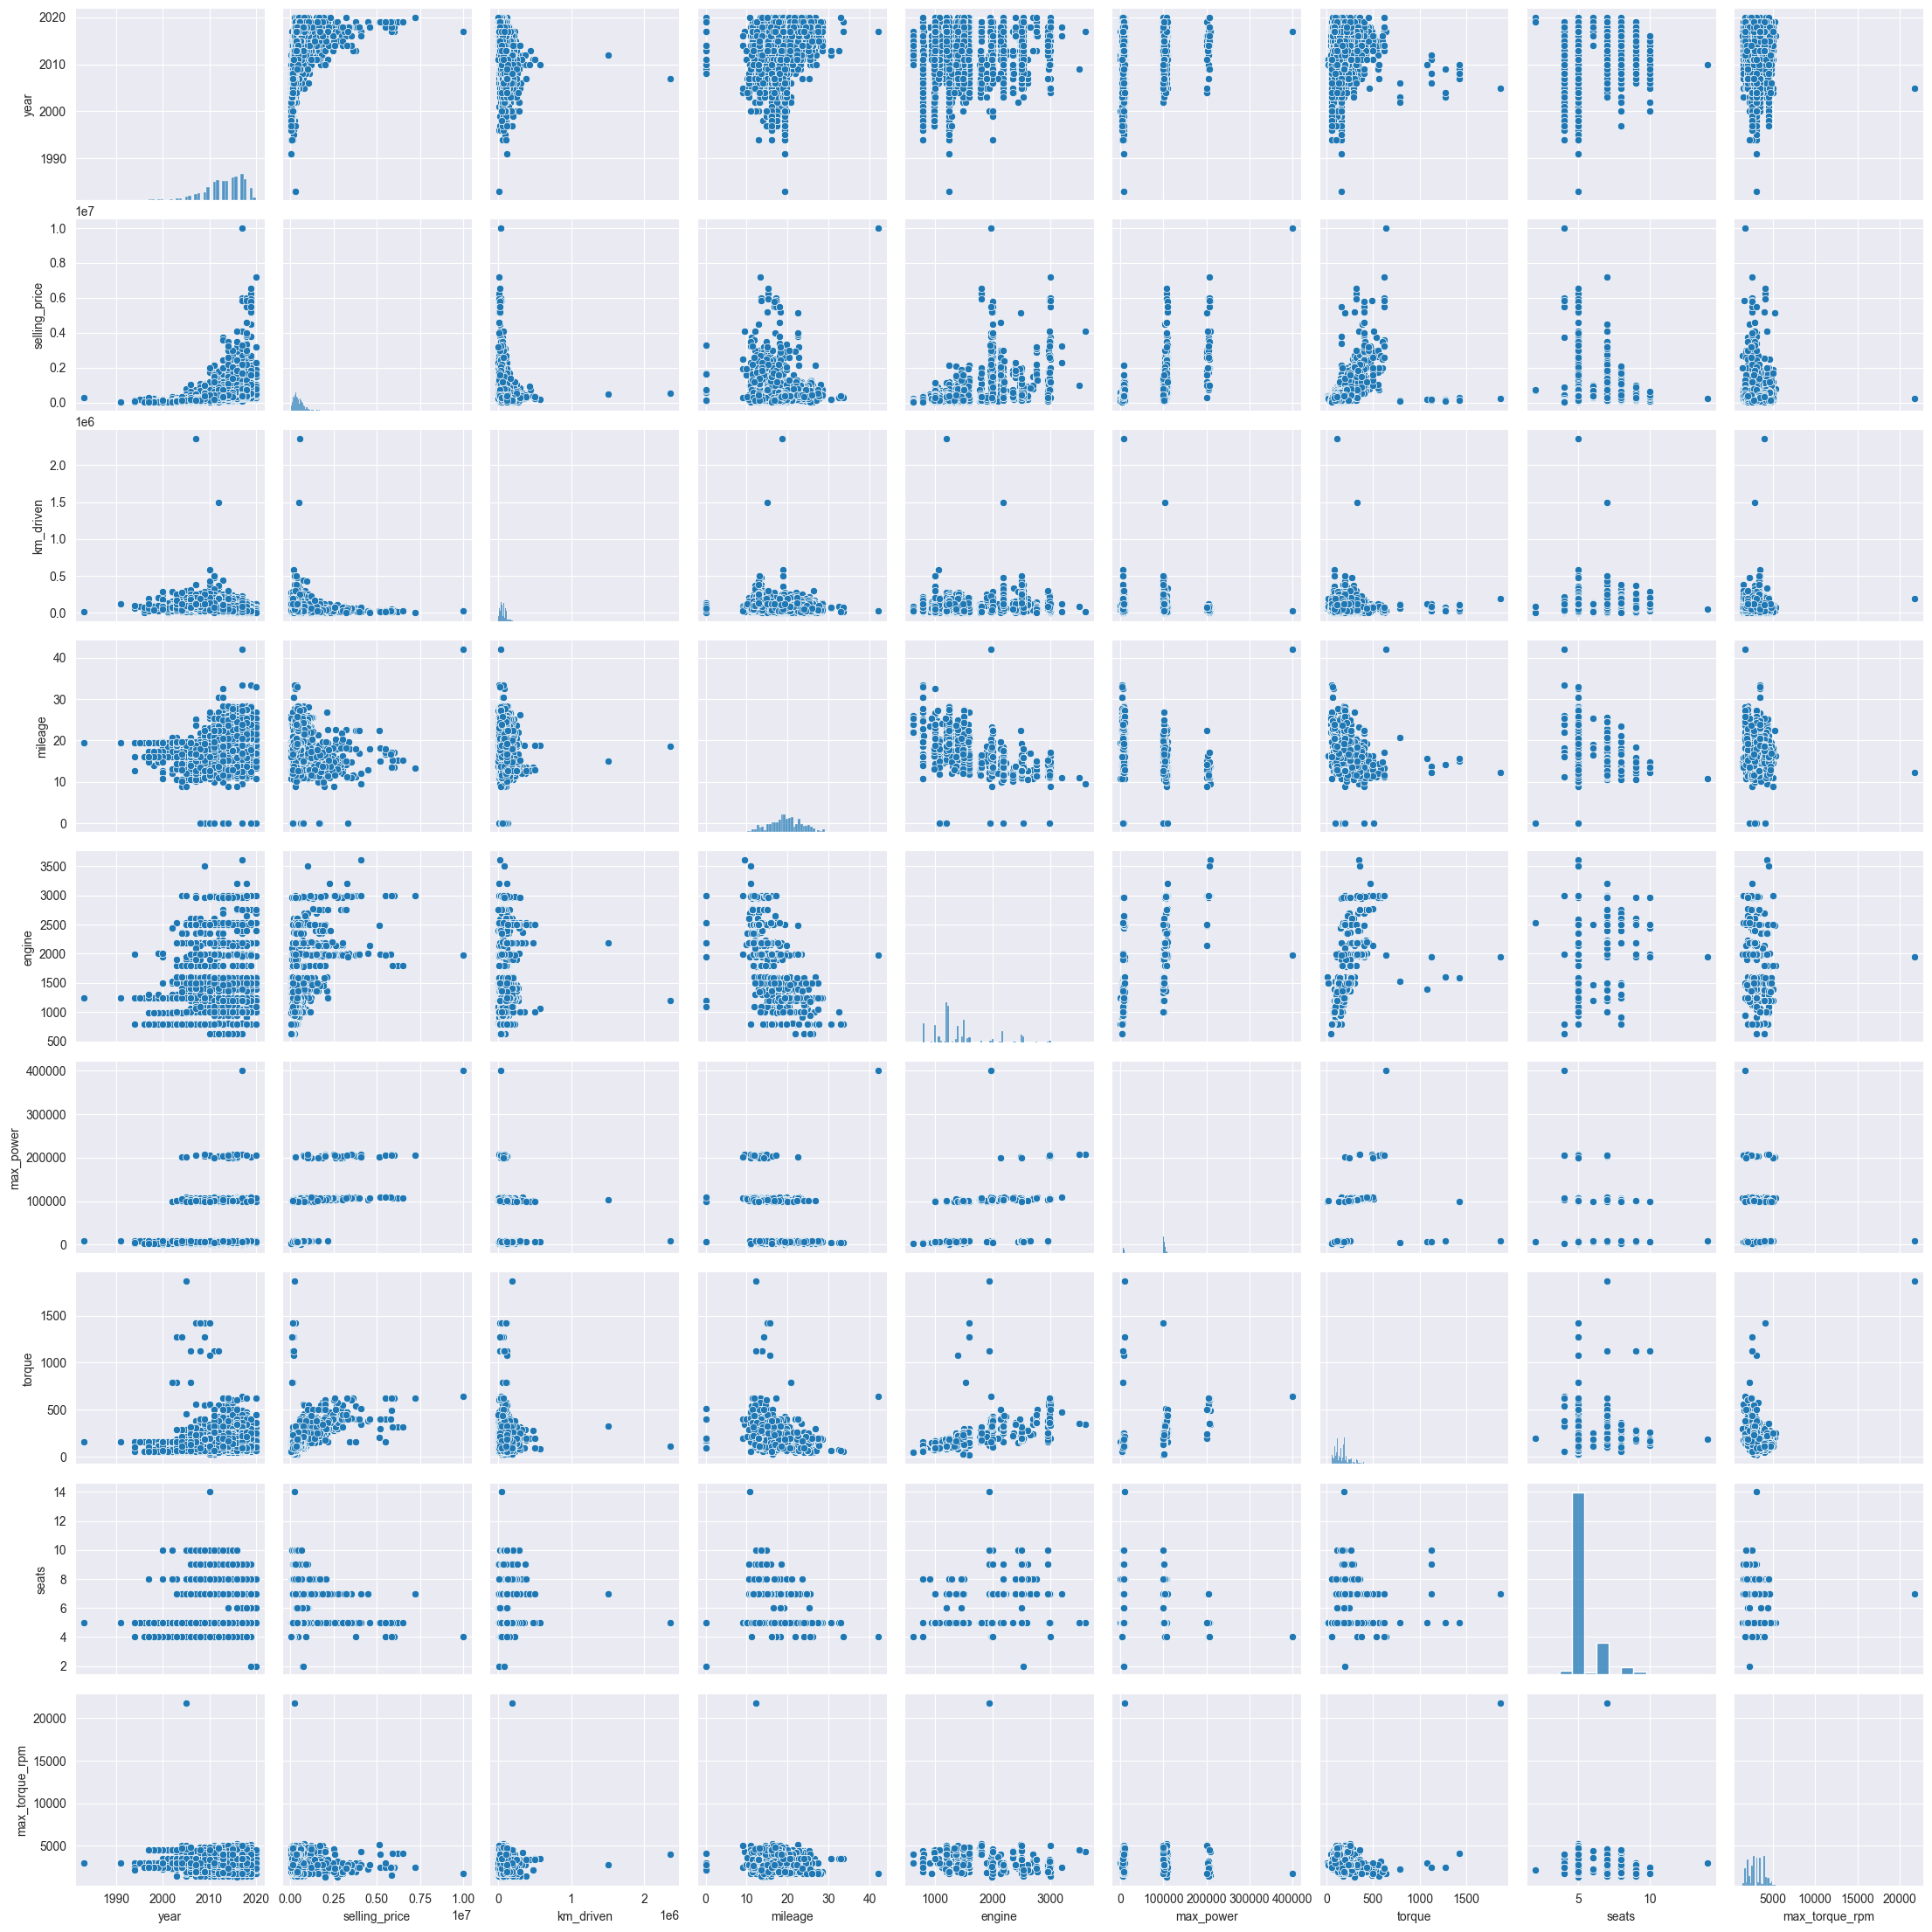

In [28]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Связь с целевой переменной: явная положительная зависимость наблюдается с переменной torque. Для более высоких значений year, engine, max_power есть более дорогие машины. С увеличением km_driven, mileage, seats, max_torque_pm, наоборот, машины в среднем дешевле.   
Визуально сложно выделить признаки с явной линейной связью, однако есть признаки с положительной (например, torque-engine, вероятно у признаков высокая корреляция) и отрицательной связью (engine-mileage)

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

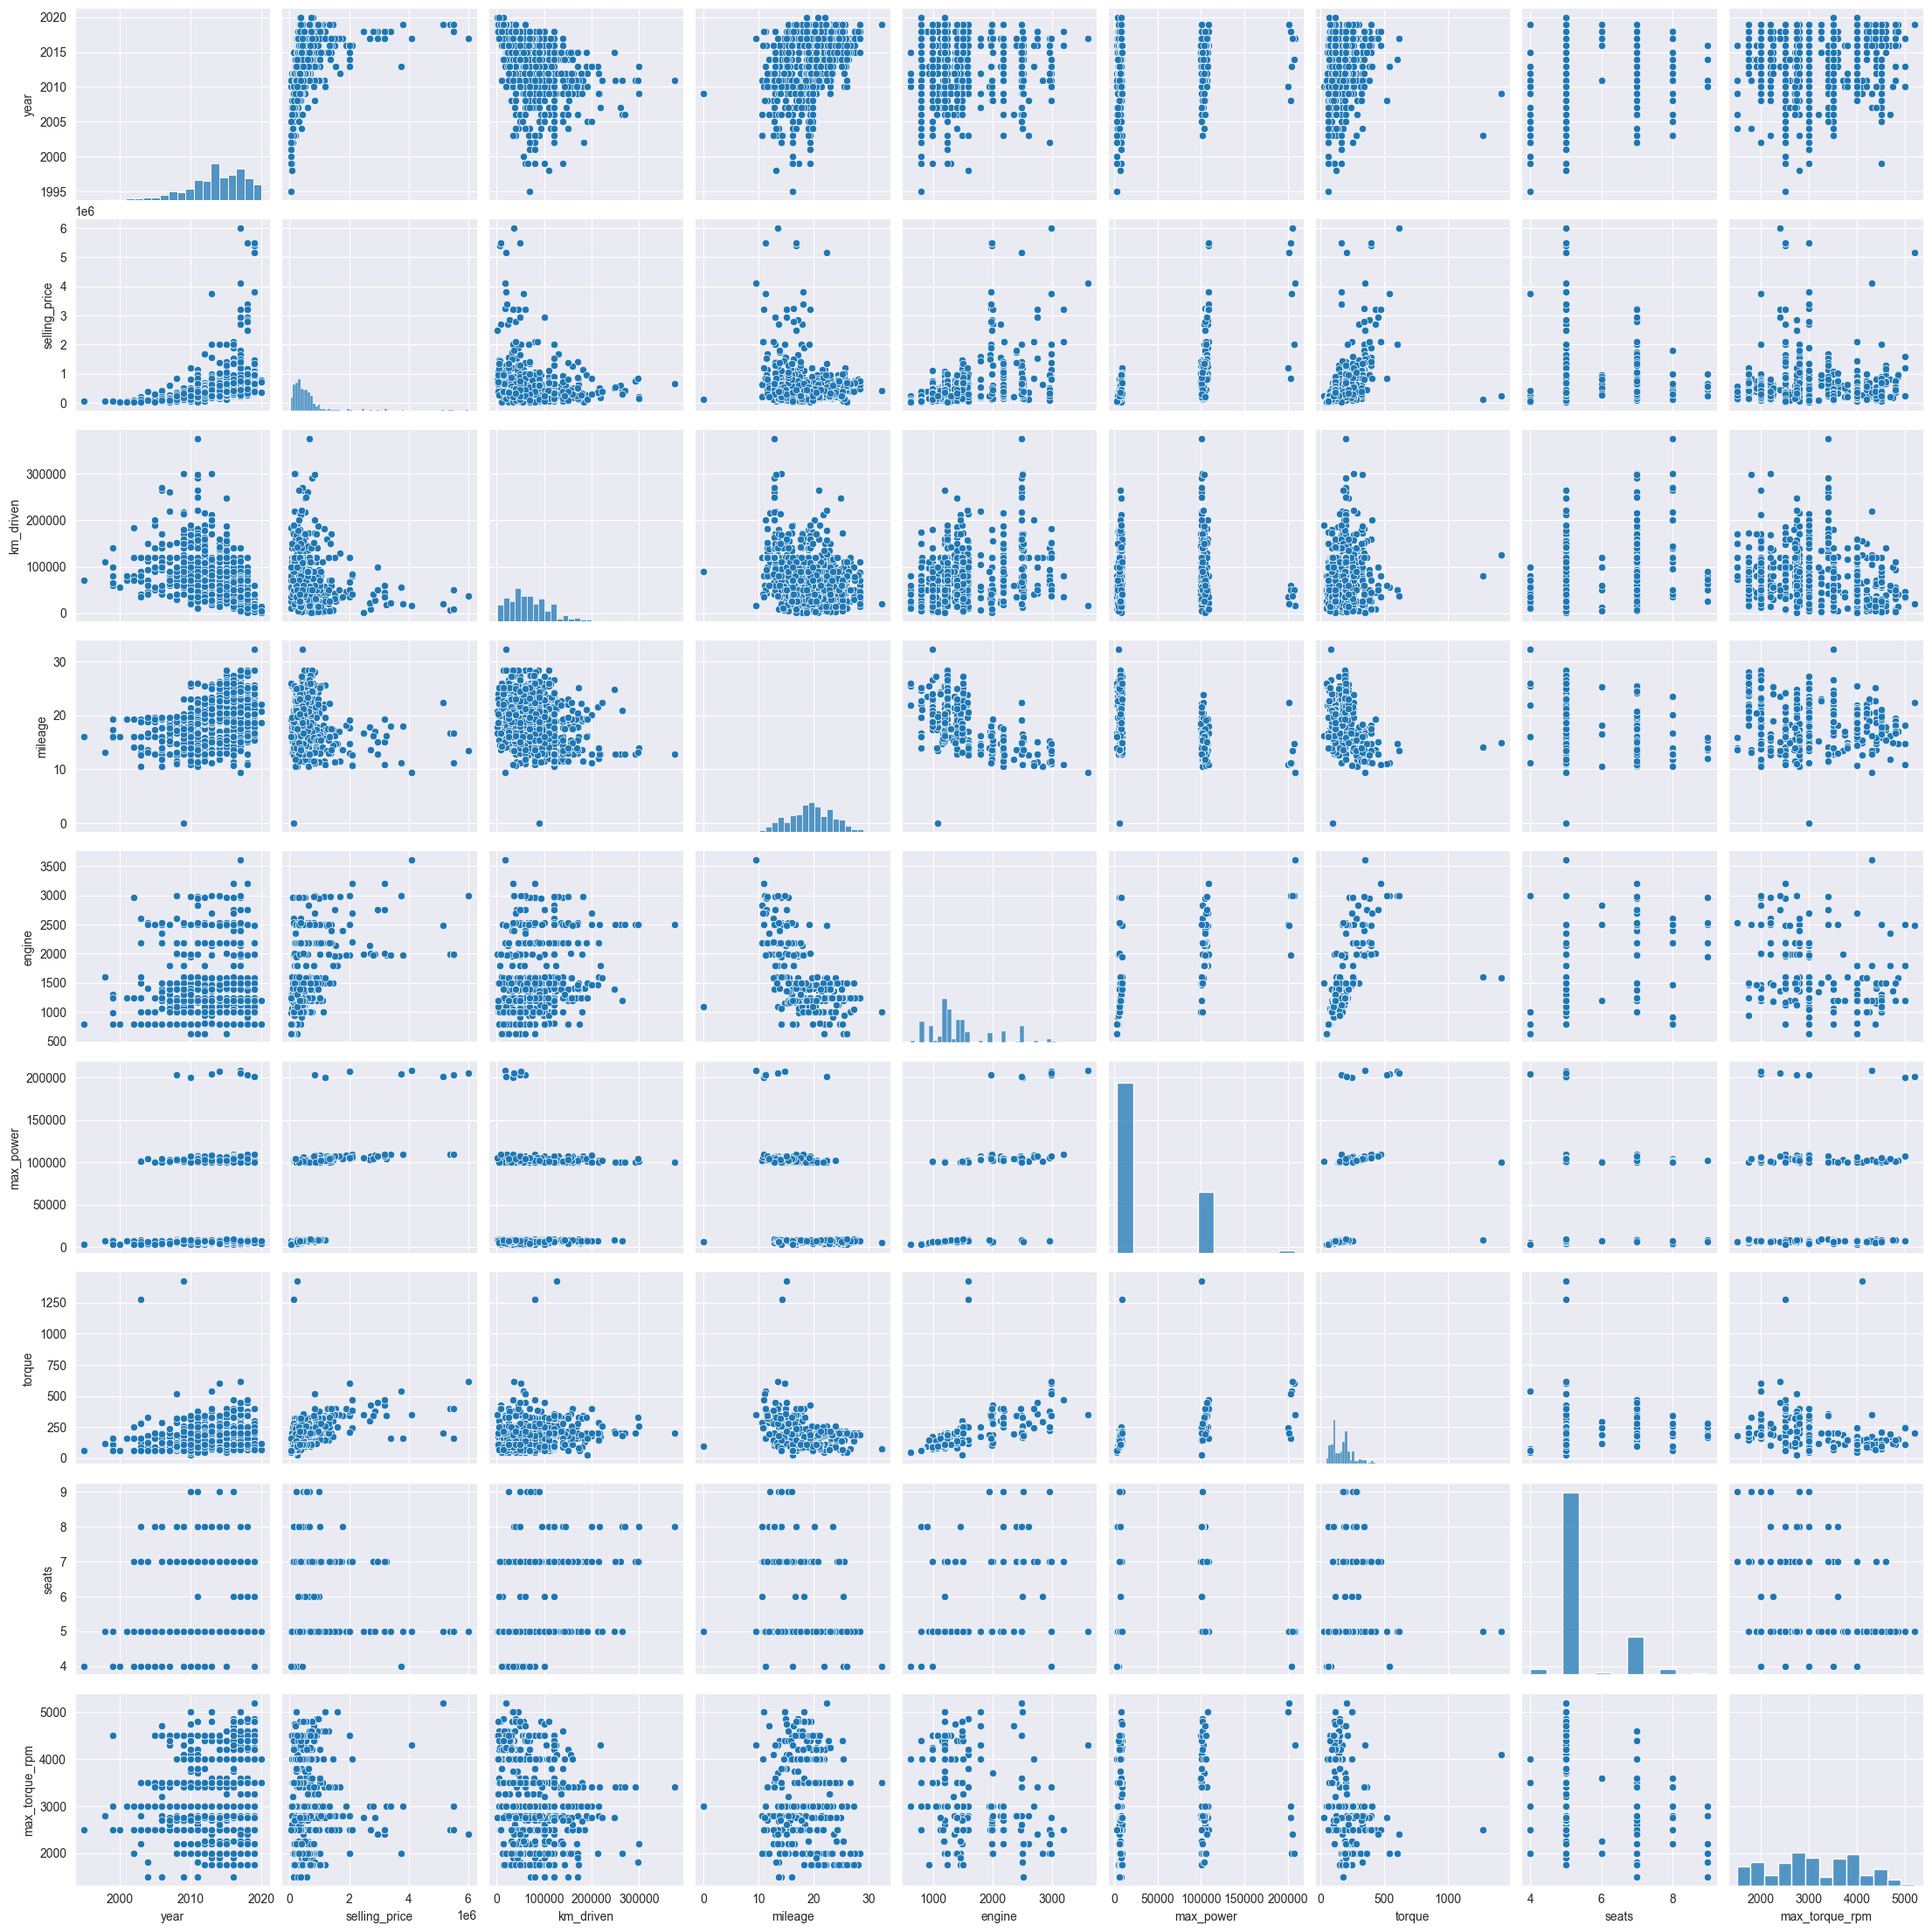

In [29]:
sns.pairplot(df_test)

Данные для трейна и теста визуально распределены одинаково

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot:>

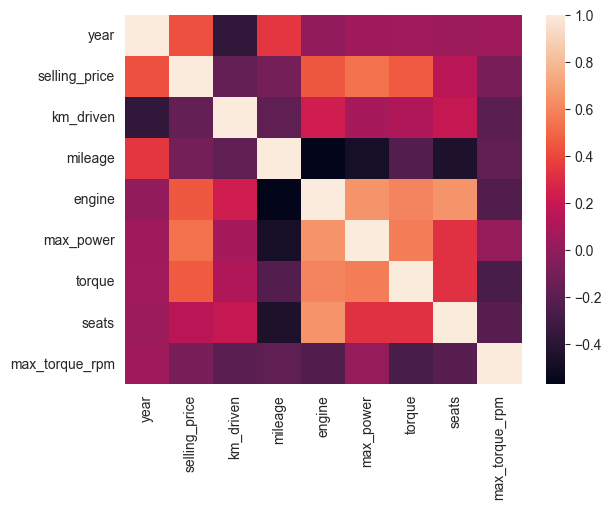

In [30]:
sns.heatmap(df_train.corr())

In [31]:
df_train.corr()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.000000,0.427279,-0.368966,0.341334,0.002819,0.046695,0.055212,0.041178,0.046399
selling_price,0.427279,1.000000,-0.164828,-0.104769,0.447672,0.527555,0.459280,0.149953,-0.088462
km_driven,-0.368966,-0.164828,1.000000,-0.182086,0.229766,0.077354,0.111736,0.192328,-0.202574
mileage,0.341334,-0.104769,-0.182086,1.000000,-0.572893,-0.475937,-0.231889,-0.451059,-0.182608
engine,0.002819,0.447672,0.229766,-0.572893,1.000000,0.652439,0.596139,0.652172,-0.243218
max_power,0.046695,0.527555,0.077354,-0.475937,0.652439,1.000000,0.570505,0.318450,0.016903
torque,0.055212,0.459280,0.111736,-0.231889,0.596139,0.570505,1.000000,0.318190,-0.266249
seats,0.041178,0.149953,0.192328,-0.451059,0.652172,0.318450,0.318190,1.000000,-0.207047
max_torque_rpm,0.046399,-0.088462,-0.202574,-0.182608,-0.243218,0.016903,-0.266249,-0.207047,1.000000


Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

Если под наименьшей скоррелированностью понимать отсутствие линейной связи, то такой парой признаков является year-engine. Если же под наименьшей скоррелированностью понимать отрицательную связь, то это пара engine-mileage.   
Сильная положительная связь наблюдается между max_power и engine.   
На основе данных чем меньше год, тем, скорее всего, больше километров проехала машина. Однако для каждой машины важно учитывать что это за машина. Например, у коллекционных машин может практически не быть пробега.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<AxesSubplot:xlabel='max_power', ylabel='engine'>

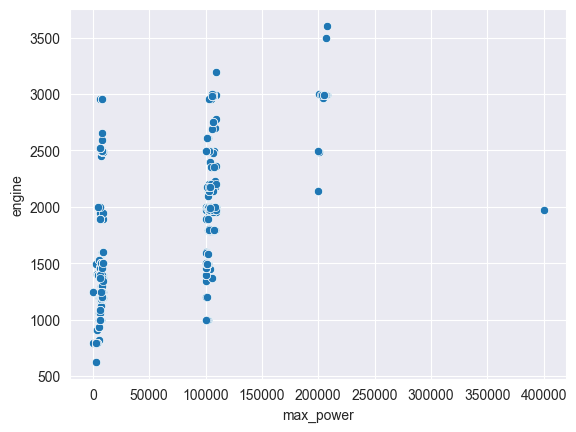

In [32]:
sns.scatterplot(df_train, x='max_power', y='engine')

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [33]:
# your code here

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [34]:
y_train = df_train['selling_price']
X_train = df_train[['year', 'km_driven', 'mileage',
                    'engine', 'max_power', 'torque',
                   'seats', 'max_torque_rpm']]

In [35]:
assert X_train.shape == (5840, 8)
#заменил 6 на 8, потому что есть вещественные признаки 'torque' и 'max_torque_rpm'

In [36]:
y_test = df_test['selling_price']
X_test = df_test[['year', 'km_driven', 'mileage',
                    'engine', 'max_power', 'torque',
                   'seats', 'max_torque_rpm']]

In [37]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print(f'R2 train: {r2_score(y_train, lr_model.predict(X_train))}')
print(f'MSE train: {MSE(y_train, lr_model.predict(X_train))}')
print(f'R2 test: {r2_score(y_test, lr_model.predict(X_test))}')
print(f'MSE test: {MSE(y_test, lr_model.predict(X_test))}')

R2 train: 0.5153039680588896
MSE train: 138932465204.26102
R2 test: 0.5051561521813825
MSE test: 284450374308.146


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
lr_model_scaled = LinearRegression()
lr_model_scaled.fit(X_train_scaled, y_train)
print(f'R2 train: {r2_score(y_train, lr_model_scaled.predict(X_train_scaled))}')
print(f'MSE train: {MSE(y_train, lr_model_scaled.predict(X_train_scaled))}')
print(f'R2 test: {r2_score(y_test, lr_model_scaled.predict(X_test_scaled))}')
print(f'MSE test: {MSE(y_test, lr_model_scaled.predict(X_test_scaled))}')

R2 train: 0.5153039680588885
MSE train: 138932465204.26135
R2 test: 0.505156152181376
MSE test: 284450374308.14984


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [41]:
for column, coef in zip(X_train.columns, lr_model_scaled.coef_):
    print(f'{column}: {coef}')

year: 201753.97687382638
km_driven: -58865.81288400027
mileage: -3170.386287668046
engine: 159126.95637938433
max_power: 162100.6420572325
torque: 77614.40728024612
seats: -105353.57211694928
max_torque_rpm: -34411.88452139557


Наиболее информативный признак - year

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [42]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
print(f'R2 train: {r2_score(y_train, lasso_model.predict(X_train_scaled))}')
print(f'MSE train: {MSE(y_train, lasso_model.predict(X_train_scaled))}')
print(f'R2 test: {r2_score(y_test, lasso_model.predict(X_test_scaled))}')
print(f'MSE test: {MSE(y_test, lasso_model.predict(X_test_scaled))}')

R2 train: 0.5153039680190417
MSE train: 138932465215.68292
R2 test: 0.5051545400600859
MSE test: 284451301001.50256


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [43]:
lasso_model.coef_

array([ 201752.26222517,  -58864.88471348,   -3167.56460766,
        159125.71430019,  162100.8341262 ,   77614.15250819,
       -105350.16247077,  -34409.76889615])

Веса не занулились. При L1-регуляризация веса могут зануляться, но не обязаны. Возможно в данном случае целевая переменная имеет такую зависимость от признаков, при которой веса не зануляются

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [44]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    Lasso(), {'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}, scoring='r2', cv=10
)

grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000,
                                   1000000]},
             scoring='r2')

In [45]:
grid.cv_results_

{'mean_fit_time': array([0.00333011, 0.00267081, 0.00223956, 0.00293486, 0.00232306,
        0.00124187, 0.00130534, 0.00061777]),
 'std_fit_time': array([0.0020996 , 0.00049741, 0.00028354, 0.00209123, 0.00147635,
        0.00020272, 0.00107575, 0.00016299]),
 'mean_score_time': array([0.00015426, 0.00019825, 0.00014873, 0.00036602, 0.00023856,
        0.00018194, 0.00014994, 0.00011914]),
 'std_score_time': array([6.23905480e-05, 1.93065567e-04, 2.53206368e-05, 5.56321325e-04,
        1.75302688e-04, 1.92094145e-04, 9.07659531e-05, 5.87502275e-06]),
 'param_alpha': masked_array(data=[0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100},
  {'alpha': 1000},
  {'alpha': 10000},
  {'alpha': 100000},
  {'alpha': 1000000}],
 'split0_test_score': array([ 0.45218992,  0.45218861,  0.4521759 , 

In [46]:
grid.best_estimator_.coef_

array([192723.49868445, -48683.64180869,      0.        , 133418.29245813,
       159895.62869401,  78325.38140903, -75532.42834609, -21203.16896803])

In [47]:
grid.best_estimator_

Lasso(alpha=10000)

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

Грид-серчу пришлось обучать 80 моделей (если под уникальной моделью понимать именно модель с уникальными коэффициентами и трейн, тест данными, а не модель с уникальными гиперпараметрами). Лучший коэффициент - 10000, один коэффициент занулился

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [48]:
from sklearn.linear_model import ElasticNet

grid = GridSearchCV(
    ElasticNet(), {'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
             'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}, scoring='r2', cv=10
)

grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000,
                                   1000000],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='r2')

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [49]:
grid.best_estimator_

ElasticNet(alpha=1, l1_ratio=0.8)

In [50]:
grid.best_score_

0.5035769175193078

Параметры лучшей модели alpha=1, l1_ratio=0.8

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [51]:
X_train_cat = df_train.drop(columns=['name', 'selling_price'])

In [52]:
assert X_train_cat.shape == (5840, 12)

In [53]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [54]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

ohe = OneHotEncoder(drop='first')
ohe.fit(X_train_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])
ohe.transform(X_train_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']]).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [55]:
ohe.get_feature_names_out(['fuel', 'seller_type', 'transmission', 'owner', 'seats'])

array(['fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_4', 'seats_5',
       'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10', 'seats_14'],
      dtype=object)

In [56]:
X_train_only_cat = pd.DataFrame(ohe.transform(X_train_cat[['fuel', 'seller_type',
                                                           'transmission', 'owner', 'seats']]).toarray(),
                               columns=ohe.get_feature_names_out(['fuel', 'seller_type',
                                                                  'transmission', 'owner', 'seats']))
X_train_only_cat

,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5836,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5837,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5838,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=['year', 'km_driven', 'mileage',
                    'engine', 'max_power', 'torque','seats', 'max_torque_rpm'])
X_train_scaled.drop(columns=['seats'], inplace=True)

In [58]:
X_train_cat_float = pd.concat([X_train_scaled, X_train_only_cat], axis=1)
X_train_cat_float

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,0.139570,1.191152,0.995867,-0.373643,-0.555773,0.142608,-1.150992,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.139570,0.766619,0.428830,0.141162,1.586838,0.702761,-0.601521,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.837167,0.883158,0.895506,-0.068879,-0.510612,0.419594,-0.326786,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.569719,0.766619,-0.835712,-0.270682,-0.531810,-0.578343,1.596361,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.872122,-0.482007,0.177929,-0.478663,-0.533421,-0.569254,1.046891,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,-1.325535,1.948653,-0.379072,-0.707236,-0.579275,-0.734032,-0.052051,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5836,-0.104614,-0.398765,-0.133189,-0.888447,-0.578123,-0.790981,0.497420,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5837,-0.104614,0.600136,-0.233549,-0.478663,-0.533191,-0.569721,1.046891,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5838,-1.569719,0.749971,-0.660081,0.130865,1.609187,0.566080,-0.326786,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [59]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    Ridge(), {'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}, scoring='r2', cv=10
)

grid.fit(X_train_cat_float, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000,
                                   1000000]},
             scoring='r2')

In [60]:
grid.best_estimator_

Ridge(alpha=10)

In [61]:
grid.best_score_

0.5675315235426633

Качество предсказаний улучшилось

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [62]:
grid = GridSearchCV(
    ElasticNet(), {'alpha': [0.05, 0.1, 1, 10, 100, 1000, 10000, 100000],
             'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]}, scoring='r2', cv=10
)

grid.fit(X_train_cat_float, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.05, 0.1, 1, 10, 100, 1000, 10000, 100000],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 0.99]},
             scoring='r2')

In [63]:
grid.best_score_

0.567303309901127

In [64]:
grid.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.99)

Лучшая модель - ridge регрессия с alpha=10

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [65]:
def business_metrics(y_true, y_pred):
    mask = pd.Series(y_pred / y_true).between(0.9, 1.1)
    return np.sum(mask) / mask.count()

In [66]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=['year', 'km_driven', 'mileage',
                    'engine', 'max_power', 'torque','seats', 'max_torque_rpm'])
X_test_scaled.drop(columns=['seats'], inplace=True)
X_test_only_cat = pd.DataFrame(ohe.transform(df_test[['fuel', 'seller_type',
                                                           'transmission', 'owner', 'seats']]).toarray(),
                               columns=ohe.get_feature_names_out(['fuel', 'seller_type',
                                                                  'transmission', 'owner', 'seats']))
X_test_cat_float = pd.concat([X_test_scaled, X_test_only_cat], axis=1)

In [67]:
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train_cat_float, y_train)

print(f'business_metric train: {business_metrics(y_train, ridge_model.predict(X_train_cat_float))}')
print(f'business_metric test: {business_metrics(y_test, ridge_model.predict(X_test_cat_float))}')

business_metric train: 0.1910958904109589
business_metric test: 0.191


# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [68]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

In [94]:
params = dict()
params['scaler_mean'] = scaler.mean_
params['scaler_scale'] = scaler.scale_
params['scaler_var'] = scaler.var_
params['encoding_categories'] = ohe.categories_
params['encoding_drop_idx'] = ohe.drop_idx_
params['encoding_n_features_in'] = ohe.n_features_in_
params['encoding_feature_names_in'] = ohe.feature_names_in_
params['encoding_infrequent_enabled'] = ohe._infrequent_enabled
params['encoding_n_features_outs'] = ohe._n_features_outs
params['ridge_coef'] = ridge_model.coef_
params['ridge_intercept'] = ridge_model.intercept_
params['ridge_in_iter'] = ridge_model.n_iter_
params['ridge_n_features_in'] = ridge_model.n_features_in_
params['ridge_feature_names_in'] = ridge_model.feature_names_in_
params['ridge_alpha'] = ridge_model.alpha

In [95]:
import pickle
with open('params.pickle', 'wb') as f:
    pickle.dump(params, f)

In [83]:
import json

In [89]:
json_data = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv').sample(5, random_state=42).to_dict('records')

In [90]:
with open("api_test.json", "w") as f:
    json.dump(json_data, f)

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link